In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Fisher Information Matrix

## Random Initialization

In [2]:
np.random.seed(42)
x = np.random.uniform(0, np.pi, (100,5))

### Quantum Neural Network

In [3]:
backend = Aer.get_backend('qasm_simulator')
np.random.seed(42)

layer1 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=2*np.pi, backend=backend)
layer2 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=2*np.pi, backend=backend)
layer3 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=2*np.pi, backend=backend)
layer4 = QLayer(n_qubits=5, n_features=5, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend)
layers = [layer1, layer2, layer3, layer4]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)
network.set_shots(100000)

In [4]:
fim = FIM(network)
fim.fit(x)
saver(fim, data_path("fim_QNN_4_depth_5_width_100k_shots"))

In [5]:
network.set_shots(1000000)
fim = FIM(network)
fim.fit(x)
saver(fim, data_path("fim_QNN_4_depth_5_width_1mill_shots"))

### Classical Network

In [11]:
np.random.seed(42)

layer1 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid(), bias=False)
layer2 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid(), bias=False)
layer3 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid(), bias=False)
layer4 = Dense(n_features=5, n_targets=1, scale = 1, activation = Identity(), bias=False)

layers = [layer1, layer2, layer3, layer4]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [12]:
fim = FIM(network)
fim.fit(x)
eigen3 = fim.eigen()

In [13]:
fim = loader(data_path("fim_QNN_4_depth_5_width_100k_shots"))
eigen1 = fim.eigen()

fim = loader(data_path("fim_QNN_4_depth_5_width_1mill_shots"))
eigen2 = fim.eigen()

### Comparison

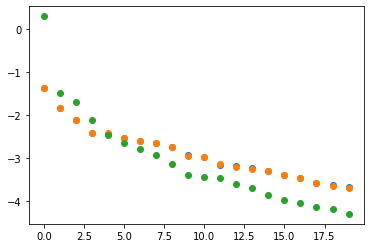

In [15]:
plt.plot(np.log10(np.abs(eigen1))[:20], "o")
plt.plot(np.log10(np.abs(eigen2))[:20], "o")
plt.plot(np.log10(np.abs(eigen3))[:20], "o")


plt.show()

NameError: name 'eigen2' is not defined

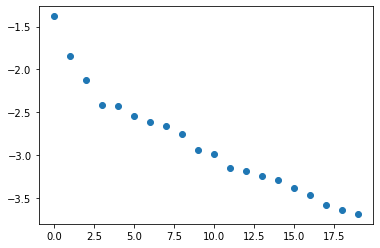

In [10]:
plt.plot(np.log10(np.abs(eigen1[:20])), "o")
plt.plot(np.log10(np.abs(eigen2[:20])), "o")
plt.show()